<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Решение-задачи-и-математическое-обоснование" data-toc-modified-id="Решение-задачи-и-математическое-обоснование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решение задачи и математическое обоснование</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Применение-алгоритма-преобразования-персональных-данных" data-toc-modified-id="Применение-алгоритма-преобразования-персональных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Применение алгоритма преобразования персональных данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Сравнение-качества-моделей" data-toc-modified-id="Сравнение-качества-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение качества моделей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [63]:
#Загрузка библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score

In [64]:
#Загрузка данных
ins = pd.read_csv('/datasets/insurance.csv')
display(ins.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [65]:
#Изучение данных
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [66]:
display(ins.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


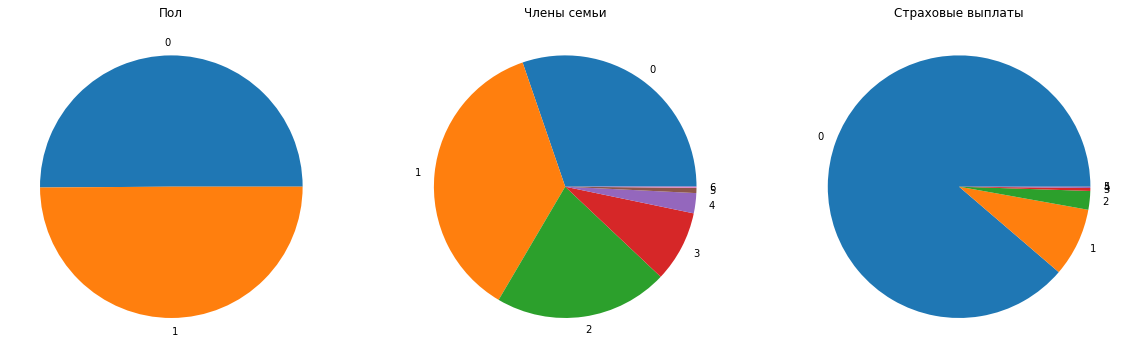

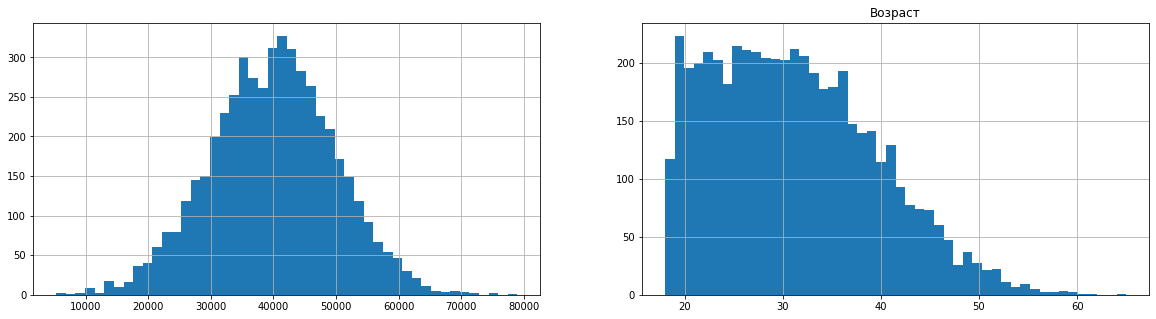

In [67]:
#Пол, Члены семьи и страховые выплаты - круговая диаграмма
fig, axs = plt.subplots(1, 3, figsize=(20, 15), sharex='col')
columns = ['Пол', 'Члены семьи', 'Страховые выплаты']
for index, name in enumerate(columns):
        ins.groupby(name)['Возраст'].agg('count').plot(kind='pie', ax=axs[index], title = name, ylabel='')
plt.show();

#Зарплата и возраст - гистограмма
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex='col')
columns = ['Зарплата', 'Возраст']
for index, name in enumerate(columns):
        ins[name].hist(bins = 48, ax=axs[index])
        plt.title(name)
plt.show();


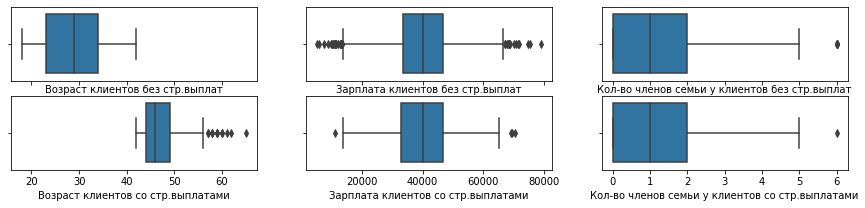

In [68]:
#Построим горизонтальные boxplot для каждой платформы
ins_with_no_claims = ins.loc[ins['Страховые выплаты'] == 0, ['Возраст', 'Зарплата', 'Члены семьи']]
ins_with_no_claims.columns = ['Возраст клиентов без стр.выплат', 
                              'Зарплата клиентов без стр.выплат', 
                              'Кол-во членов семьи у клиентов без стр.выплат']
ins_with_claims = ins.loc[ins['Страховые выплаты'] != 0, ['Возраст', 'Зарплата', 'Члены семьи']]
ins_with_claims.columns = ['Возраст клиентов со стр.выплатами', 
                           'Зарплата клиентов со стр.выплатами', 
                           'Кол-во членов семьи у клиентов со стр.выплатами']

fig, axs = plt.subplots(2, 3, figsize=(15, 3), sharex='col')
sns.boxplot(data=ins_with_no_claims, x='Возраст клиентов без стр.выплат', orient = 'h', ax = axs[0, 0])
sns.boxplot(data=ins_with_claims, x='Возраст клиентов со стр.выплатами', orient = 'h', ax = axs[1, 0])
sns.boxplot(data=ins_with_no_claims, x='Зарплата клиентов без стр.выплат', orient = 'h', ax = axs[0, 1])
sns.boxplot(data=ins_with_claims, x='Зарплата клиентов со стр.выплатами', orient = 'h', ax = axs[1, 1])
sns.boxplot(data=ins_with_no_claims, x='Кол-во членов семьи у клиентов без стр.выплат', orient = 'h', ax = axs[0, 2])
sns.boxplot(data=ins_with_claims, x='Кол-во членов семьи у клиентов со стр.выплатами', orient = 'h', ax = axs[1, 2])
plt.show()

**Вывод:**
* В таблице персональных данных содержатся данные 5000 клиентов. В полученной таблице содержатся данные о поле, возрасте, зарплате, количестве членов семьи и о наличии страховых выплат. В целях дальнейшего построения модели признак количества выплат является целевым;
* Данные не содержат пропусков
* Количество мужчин и женщин в данных примерно одинаково. Показатель заработной платы имеет нормальное распределение, показатели возраста, количества членов семьи, количества страховых выплат - логнормальное распределение.
* По результатам исследования взаимосвязи признаков с целевым признаком количества выплат выявлено, что показатели страховых выплат и зарплаты, страховых выплат и кол-ва членов семьи независимы друг от друга. При этом выявлена взаимосвязь показателей страховых выплат и возраста: среди клиентов до 42 лет отсутствуют страховые выплаты. При этом у клиентов более 42 лет у всех есть минимум одна страховая выплата. Но данный факт не обязательно означает, что не стоит страховать клиентов старше 42 лет - возможно, наличие страховых выплат у таких клиентов связано с большим сроком страхования, или с тем, что по договору клиенты застрахованы на дожитие до определенного возраста. В любом случае, данный показатель необходимо дополнительно исследовать.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Задача

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?
 * Изменится. Приведите примеры матриц.
 * Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

### Решение задачи и математическое обоснование

**Ответ:** Качество модели не изменится

**Обоснование:** 

Сравним обычные формулы предсказаний и вектора весов, и те же формулы, если признаки умножить на обратимую матрицу

Обычные формулы:

$$w = (X^T X)^{-1} X^T y$$
$$a = X w$$
$$a = X * (X^T X)^{-1} X^T y$$

Формулы, если признаки умножить на обратимую матрицу P:

$$w' = ((X * P)^T (X * P))^{-1} (X * P)^T y$$
$$a = XP w$$

Докажем эквивалентность путем нескольких преобразований:

1. Раскроем в формуле вектора весов скобки в части, где есть транспонирование ($(AB)^T = B^T * A^T$)

$w' = ((P^T * X^T * X * P))^{-1} (P^T * X^T) y $

2. Возьмем $X^T X$ за скобки и раскроем скобку с преобразованием в обратную матрицу ($(ABC)^{-1} = C^{-1} * B^{-1} * A^{-1}$)

$w' = P^{-1} * (X^T * X)^{-1} * (P^T)^{-1} * P^T * X^T * y $

3. Получаем умножение одной матрицы на такую же, только обратную ($(P^T)^{-1} P^T$). По свойству матриц ($A^{-1} A = E$) заменяем их на единичную матрицу

$w' = P^{-1} * (X^T * X)^{-1} * E * X^T * y $

4. По свойству единичных матриц (AE = EA = A) получаем, что E можно убрать из записи:

$w' = P^{-1} * (X^T * X)^{-1} * X^T * y $

Т.о. получаем, что:

$w' = P^{-1} * w $

5. Подставим w' в формулу предсказания a

$a = X * P * P^{-1} * (X^T X)^{-1} X^T * y$

6. Получаем умножение матрицы P на такую же, только обратную. Заменяем $P * P^{-1}$ на E, и убираем Е из записи формулы (т.к. AE = EA = A)

$a = X * (X^T X)^{-1} X^T * y$

Таким образом, получилось выйти на первоначальную формулу предсказания модели

**Вывод:**

По результатам решения задачи было получено подтверждение, что при умножении матрицы признаков на обратимую матрицу качество полученной модели линейной регрессии не меняется

## Алгоритм преобразования

**Алгоритм**

1. Создается функция, возвращающая квадратную матрицу, заполненную случайными значениями. Размер матрицы определяется по количеству признаков в модели


2. Данные разделяются на обучающую и тестовую выборки

Исходные данные разделяются на обучающую и тестовую выборку, на признаки и целевой признак. В целях тестирования алгоритма исходные данные будут сохранены в неизменном виде в отдельной переменной для дальнейшего сравнения

3. Признаки модели из обучающей и тестовой выборки умножаются на квадратную матрицу 

Матрица создается функцией из п.1. Количество строк и столбцов в матрице равно количеству признаков. Матрица заполнена случайными значениями. Матрица создается перед обучением и хранится в качестве отдельного объекта. При отправке кому-либо зашифрованных персональных данных, отдельным письмом или альтернативным способом получателю можно передать случайную матрицу в качестве ключа, по которому можно будет восстановить первоначальные значения.

4. Создается модель линейной регрессии, обучается на обучающей выборке

В целях тестирования алгоритма будут созданы 2 модели - модель, обученная на первоначальных данных, и модель, обученная на признаках, умноженных на случайную матрицу

5. Проверяется качество моделей

Для моделей будут рассчитана метрика R2. Качество модели после преобразования должно остаться неизменным

**Обоснование**

1. После умножения признаков на случайную матрицу качество модели не должно измениться, так как в п.2 данного проекта было доказано, что умножение признаков на случайную матрицу не оказывает влияния на предсказание модели линейной регрессии.


2. При перехвате злоумышленником персональных данных, первоначальные данные будет практически невозможно восстановить, не зная данных случайной матрицы. Например, при заполнении матрицы 4х4 16ю рандомными числами, даже при условии, что числа заранее известны, а в матрице отсутствуют повторения, существует 16! (20 922 789 888 000) вариантов перестановок данных чисел.

In [69]:
#Функция, создающая квадратную матрицу, заполненную случайными значениями

def create_random_matrix(features):
    try:
        columns = features.shape[1]
        random_matrix = np.random.rand(columns, columns)
        np.linalg.inv(random_matrix) #Проверка на обратимость
        return random_matrix
    except:
        create_random_matrix(features)

## Проверка алгоритма

### Разделение данных на обучающую и тестовую выборки

In [70]:
features = ins.drop('Страховые выплаты', axis=1)
target = ins['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=123)

### Применение алгоритма преобразования персональных данных

In [71]:
#Создание случайной матрицы для шифрования данных
random_matrix = create_random_matrix(features_train)
print('Случайная матрица:')
print(random_matrix)

Случайная матрица:
[[0.85335427 0.2289277  0.18298137 0.42221575]
 [0.96744229 0.037006   0.86887341 0.25602741]
 [0.3727633  0.73722578 0.72536739 0.36108303]
 [0.20786947 0.87861015 0.64609481 0.64386506]]


In [72]:
#Шифрование персональных данных в обучающей и тестовой выборке
new_features_train = pd.DataFrame(np.array(features_train).dot(random_matrix), columns = features_train.columns)
new_features_test = pd.DataFrame(np.array(features_test).dot(random_matrix), columns = features_test.columns)
print('Зашифрованные данные в обучающей выборке:')
display(new_features_train.head())
print('Зашифрованные данные в тестовой выборке:')
display(new_features_test.head())

Зашифрованные данные в обучающей выборке:


,Пол,Возраст,Зарплата,Члены семьи
0,15910.008829,31408.914383,30928.192330,15391.527699
1,9311.890596,18359.139539,18088.543373,8999.714264
2,17021.224974,33618.383526,33097.606098,16471.530668
3,13206.156938,26026.761795,25648.689877,12759.420045
4,13971.223944,27573.583128,27154.989695,13512.608231


Зашифрованные данные в тестовой выборке:


,Пол,Возраст,Зарплата,Члены семьи
0,14678.506766,28974.275096,28532.318869,14198.409954
1,14122.472017,27869.426060,27447.520494,13658.197361
2,20170.568023,39815.452515,39208.230411,19511.978233
3,15017.977591,29637.734396,29189.310908,14524.242599
4,9978.027320,19685.960905,19389.860314,9648.383575


### Обучение моделей

In [73]:
#Обучение модели до преобразования
model_before = LinearRegression()
model_before.fit(features_train, target_train)
predictions_before = model_before.predict(features_test)

In [74]:
#Обучение модели после преобразования
model_after = LinearRegression()
model_after.fit(new_features_train, target_train)
predictions_after = model_after.predict(features_test)

### Сравнение качества моделей

In [75]:
print(model_before.score(features_test, target_test))
print(model_after.score(new_features_test, target_test))

0.43018469990932917
0.43018469990922703


**Вывод:**

После шифрования персональных данных с помощью матрицы качество модели осталось практически неизменным

## Общий вывод

**1. Изучение данных**

* В таблице персональных данных содержатся данные 5000 клиентов. В полученной таблице содержатся данные о поле, возрасте, зарплате, количестве членов семьи и о наличии страховых выплат;
* Количество мужчин и женщин в данных примерно одинаково. Показатель заработной платы имеет нормальное распределение, показатели возраста, количества членов семьи, количества страховых выплат - логнормальное распределение;
* По результатам исследования взаимосвязи признаков с целевым признаком количества выплат выявлено, что показатели страховых выплат и зарплаты, страховых выплат и кол-ва членов семьи независимы друг от друга. При этом выявлена взаимосвязь показателей страховых выплат и возраста: среди клиентов до 42 лет отсутствуют страховые выплаты. При этом у клиентов более 42 лет у всех есть минимум одна страховая выплата. Но данный факт не обязательно означает, что не стоит страховать клиентов старше 42 лет - возможно, наличие страховых выплат у таких клиентов связано с большим сроком страхования, или с тем, что по договору клиенты застрахованы на дожитие до определенного возраста. В любом случае, данный показатель необходимо дополнительно исследовать.

**2. Умножение матриц**

В рамках проекта получено доказательство, что умножение признаков модели на любую обратимую матрицу не влияет на качество моделей

**3. Алгоритм преобразования**

В качестве алгоритма для шифрования персональных данных предложен алгоритм, предусматривающий умножение признаков модели на случайную матрицу.

**4. Проверка алгоритма**

По результатам сверки метрики R2 было получено подтверждение, что качество модели не изменилось:
* R2 модели без шифрования персональных данных: 0.4302
* R2 модели после шифрования персональных данных: 0.4302